In [1]:
import numpy as np
import xarray as xr
# our local module:
import wavenumber_frequency_functions as wf
import matplotlib as mpl
import matplotlib.pyplot as plt


# put the PDF computing function here
# put lat-lon specs
# make lon-wise pdf for 585,246,g6solar and sulfur
# make a ridge plot

# -------
# 585    |
#        | here the gausiian will be red and towards right
# -------
# -------
# 245    |
#        | here the gasian will be slightly red
# -------
# -------
# G6sul  |
#        | here the gasian will same as 245 . On the RHS panels plot diff G6-245 and G6-585
# -------
# -------
# G6sol  |
#        | here the gasian will same as 245 . On the RHS panels plot diff G6-245 and G6-585
# -------


# Put the whole above on left for first 30 and then on right last 30

In [2]:
import xarray as xr
from pathlib import Path
import myfunctions as mf

In [3]:
# =========================
# User-defined metadata
# =========================

varname = "pr"

# =========================
# Base CEDA paths
# =========================

CEDA_BASE = Path("/badc/cmip6/data/CMIP6")

In [4]:
#Model Names
MODELS = {
    "UKESM1-0-LL":  {"institution": "MOHC",         "ensemble": "r1i1p1f2",  "grid": "gn",},
    "CNRM-ESM2-1":  {"institution": "CNRM-CERFACS", "ensemble": "r1i1p1f2",  "grid": "gr",},
    "MPI-ESM1-2-LR":{"institution": "MPI-M",        "ensemble": "r1i1p1f1",  "grid": "gn",},
    # "CESM2-WACCM":  {"institution": "NCAR",         "ensemble": "r1i1p1f1",  "grid": "gn",},
    "IPSL-CM6A-LR": {"institution": "IPSL",         "ensemble": "r1i1p1f1",  "grid": "gr",},
}


In [5]:
#Experiment details
EXPERIMENTS = {
    # "HIST":     {"project": "CMIP",        "scenario": "historical", "color": "black"},
    "SSP245":   {"project": "ScenarioMIP", "scenario": "ssp245"},
    "SSP585":   {"project": "ScenarioMIP", "scenario": "ssp585"},
    "G6solar":  {"project": "GeoMIP",      "scenario": "G6solar"},
    "G6sulfur": {"project": "GeoMIP",      "scenario": "G6sulfur"},
}

In [6]:


# counts_all={}

# for row, (model_name, model_meta) in enumerate(MODELS.items()):
    
#     counts_all[model_name] = {}

#     # --- read DAILY data (unchanged logic) ---
#     for exp, meta in EXPERIMENTS.items():

#         # if exp != "SSP245":   # WK usually one experiment at a time
#         #     continue

#         if model_name == "CESM2-WACCM":
#             ensemble = "r1i1p1f2" if meta["scenario"] == "G6sulfur" else "r1i1p1f1"
#         else:
#             ensemble = model_meta["ensemble"]

#         base = (
#             CEDA_BASE
#             / meta["project"]
#             / model_meta["institution"]
#             / model_name
#             / meta["scenario"]
#             / ensemble
#             / "day"
#             / varname
#             / model_meta["grid"]
#             / "latest"
#         )

#         print(f"Reading {model_name} {exp}")
#         ds = mf.open_files(str(base))
#         da = mf.read_var(ds, varname)

#     # # --- WK REQUIRED FIXES ---
#     # da = da.rename({"lat": "lat", "lon": "lon"})
#     # da = da.sortby("lat")
#     da = da.sel(time=slice("2071-01-01", "2100-12"))
#     da = da.load()

#     # ensure daily
#     da = da.resample(time="1D").mean()*86400

#     ############# for PDF ###### NOT NEEDED ###########
#     # # Select tropics
#     # da_tropics = da.sel(lat=slice(-15, 15))
    
#     # # Area weights (cos lat)
#     # weights = np.cos(np.deg2rad(da_tropics.lat))
    
#     # # Stack dimensions first
#     # da_stack = da_tropics.stack(z=("time", "lat", "lon"))
    
#     # # Broadcast weights to match lat dimension before stacking
#     # w2d = weights.broadcast_like(da_tropics.isel(time=0))
#     # w_stack = np.tile(w2d.values.flatten(), da_tropics.sizes["time"])
    
#     # # Extract values
#     # values = da_stack.values
#     # values = values - 273.15  # optional °C conversion
    
#     # # Remove NaNs
#     # mask = np.isfinite(values)
#     # values = values[mask]
#     # w_stack = w_stack[mask]
    
#     # # Weighted histogram
#     # bins = np.linspace(values.min(), values.max(), 60)
#     # hist, edges = np.histogram(values, bins=bins, weights=w_stack, density=True)
#     # centers = 0.5 * (edges[:-1] + edges[1:])

#     ########## Count of Events ####### THIS IS What I wanted to see####### Even this did not work
#     # # --- Select tropics ---
#     # da_tropics = da.sel(lat=slice(-15, 15))
    
#     # # --- Area-weighted tropical mean temperature per day ---
#     # weights = np.cos(np.deg2rad(da_tropics.lat))
#     # trop_daily_mean = da_tropics.weighted(weights).mean(("lat", "lon"))
    
#     # # Convert to °C (optional)
#     # trop_daily_mean = trop_daily_mean - 273.15
    
#     # # Remove NaNs
#     # values = trop_daily_mean.values
#     # values = values[np.isfinite(values)]
    
#     # # --- Histogram: counts, NOT density ---
#     # bins = np.linspace(values.min(), values.max(), 40)
#     # counts, edges = np.histogram(values, bins=bins, density=False)
    
#     # centers = 0.5 * (edges[:-1] + edges[1:])
#     ######################## % of days ####################
#     # Select tropics
#     da_tropics = da.sel(lat=slice(-15, 15))
    
#     # Convert to °C
#     da_c = da_tropics ;#- 273.15
    
#     # Flatten all values (time × lat × lon)
#     values = da_c.values.flatten()
    
#     # Remove NaNs
#     values = values[np.isfinite(values)]
#     # print(values.min(), values.max())  # <-- check this once
    
#     # Define 1°C bins
#     # bins = np.arange(0, 100, 1)   # 1–2, 2–3, ..., 47–48
#     bin_edges_ref = np.arange(0, 100, 1)
#     # bins = np.arange(np.floor(values.min()), np.ceil(values.max()) + 1, 1)

#     # # Define bins ONCE for consistency
#     # if bin_edges_ref is None:
#     #     bin_edges_ref = np.arange(
#     #         np.floor(values.min()),
#     #         np.ceil(values.max()) + 1,
#     #         1
#     #     )
    
#     # Count occurrences
#     counts, edges = np.histogram(values, bins=bin_edges_ref)

#     # Convert to percentage
#     percent = (100 * counts / counts.sum())

#     # --- STORE ---
#     counts_all[model_name][exp] = {
#         "counts": counts,
#         "percent": percent,
#         "bin_edges": bin_edges_ref,
#     }
    
# #     # Bin centers for plotting
# #     centers = 0.5 * (edges[:-1] + edges[1:])

# #     axes[row, 0].set_ylabel(model_name, fontsize=9)
# #     # axes[row, 0].plot(centers, hist, label="Symmetric")
# #     # axes[row, 0].set_title(model_name)
# #     # axes[row, 0].set_xlabel("Surface Temperature (°C)")
# #     # axes[row, 0].set_ylabel("Probability Density")
# #     # axes[row, 0].bar(centers, counts, width=np.diff(edges), align="center")
# #     # axes[row, 0].set_ylabel("Number of Days")
# #     # axes[row, 0].set_xlabel("Tropical Mean Surface Temperature (°C)")
# #     # axes[row, 0].set_title(model_name)
# #     axes[row, 0].bar(centers, percent, width=1.0)
# #     axes[row, 0].set_xlabel("Surface Temperature (°C)")
# #     axes[row, 0].set_ylabel("Percentage of Occurrences (%)")
# #     axes[row, 0].set_title(model_name)

# # # axes[0, 0].set_title("Symmetric", fontsize=11)
# # # axes[0, 1].set_title("Asymmetric", fontsize=11)

# # plt.suptitle("PDF of surface Temperature (Daily CMIP6)", y=0.95)
# # plt.tight_layout()
# # plt.show()


need o plot spectra for all models.
and then need to plot the arrow-type plot for them to show if MJO moves faster or slower in a GeoMIP simulation contrasting fairst 30 and the last 30 years


In [7]:
counts_all = {}

for model_name, model_meta in MODELS.items():

    counts_all[model_name] = {}

    for exp, meta in EXPERIMENTS.items():

        if model_name == "CESM2-WACCM":
            ensemble = "r1i1p1f2" if meta["scenario"] == "G6sulfur" else "r1i1p1f1"
        else:
            ensemble = model_meta["ensemble"]

        base = (
            CEDA_BASE
            / meta["project"]
            / model_meta["institution"]
            / model_name
            / meta["scenario"]
            / ensemble
            / "day"
            / varname
            / model_meta["grid"]
            / "latest"
        )

        print(f"Reading {model_name} {exp}")
        ds = mf.open_files(str(base))
        da = mf.read_var(ds, varname)

        # --- PROCESS INSIDE EXP LOOP ---
        da = da.sel(time=slice("2071-01-01", "2100-12")).load()
        da = da.resample(time="1D").mean()*86400   # remove *86400 for tas

        da_tropics = da.sel(lat=slice(-15, 15))

        values = da_tropics.values.flatten()
        values = values[np.isfinite(values)]

        bin_edges_ref = np.arange(0, 50, 1)

        counts, edges = np.histogram(values, bins=bin_edges_ref)
        percent = 100 * counts / counts.sum()

        # --- STORE ---
        counts_all[model_name][exp] = {
            "counts": counts,
            "percent": percent,
            "bin_edges": bin_edges_ref,
        }

Reading UKESM1-0-LL SSP245
Reading UKESM1-0-LL SSP585
Reading UKESM1-0-LL G6solar
Reading UKESM1-0-LL G6sulfur
Reading CNRM-ESM2-1 SSP245
Reading CNRM-ESM2-1 SSP585
Reading CNRM-ESM2-1 G6solar
Reading CNRM-ESM2-1 G6sulfur
Reading MPI-ESM1-2-LR SSP245
Reading MPI-ESM1-2-LR SSP585
Reading MPI-ESM1-2-LR G6solar
Reading MPI-ESM1-2-LR G6sulfur
Reading IPSL-CM6A-LR SSP245
Reading IPSL-CM6A-LR SSP585
Reading IPSL-CM6A-LR G6solar
Reading IPSL-CM6A-LR G6sulfur


In [8]:
counts_all

{'UKESM1-0-LL': {'SSP245': {'counts': array([27233390,  4585016,  2468334,  1720586,  1345825,  1121024,
            965107,   849270,   756138,   679010,   614747,   555437,
            503497,   458970,   419627,   382096,   348979,   320153,
            293951,   268583,   247051,   228449,   209762,   194893,
            179107,   166943,   155188,   145127,   134525,   126532,
            117943,   111565,   104114,    97671,    92591,    87551,
             82646,    77757,    73576,    69109,    65059,    61720,
             58337,    54724,    52396,    49173,    46057,    43587,
             41500]),
   'percent': array([55.50540491,  9.34489498,  5.03080513,  3.50679157,  2.74297697,
           2.28480153,  1.96702118,  1.73092939,  1.54111353,  1.38391603,
           1.25293917,  1.13205721,  1.02619633,  0.93544416,  0.8552577 ,
           0.77876435,  0.71126733,  0.65251597,  0.59911268,  0.5474092 ,
           0.50352401,  0.46561057,  0.42752389,  0.39721881,  0.3650447

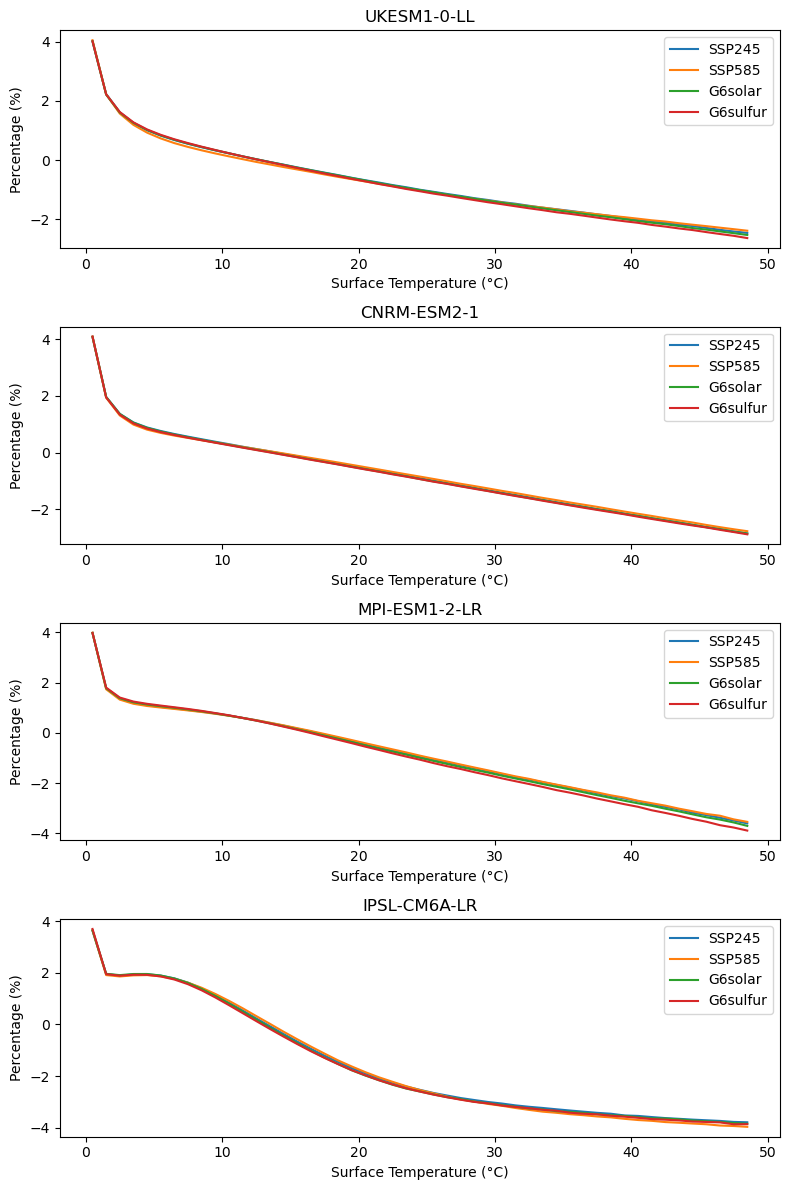

In [10]:
fig, axes = plt.subplots(
    nrows=len(counts_all),
    ncols=1,
    figsize=(8, 3 * len(counts_all)),
)

axes = np.atleast_1d(axes)

for row, model in enumerate(counts_all):

    for exp in counts_all[model]:

        percent = np.log(counts_all[model][exp]["percent"])
        edges = counts_all[model][exp]["bin_edges"]
        centers = 0.5 * (edges[:-1] + edges[1:])

        axes[row].plot(centers, percent, label=exp)

    axes[row].set_title(model)
    axes[row].set_xlabel("Surface Temperature (°C)")
    axes[row].set_ylabel("Percentage (%)")
    axes[row].legend()

plt.tight_layout()
plt.show()